In [4]:
import ptitprince as pt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

#### (Test) All Categories

In [5]:
data = pd.read_csv('topics-post-RADAR-data.csv')

columns_to_keep = ['STUD_REFORMATTED', 'STUD_RED_RADAR','STUD_ALL_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR',
                   'GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

melted_data = data[columns_to_keep]

melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')

<Axes: xlabel='RADAR_output', ylabel='Category'>

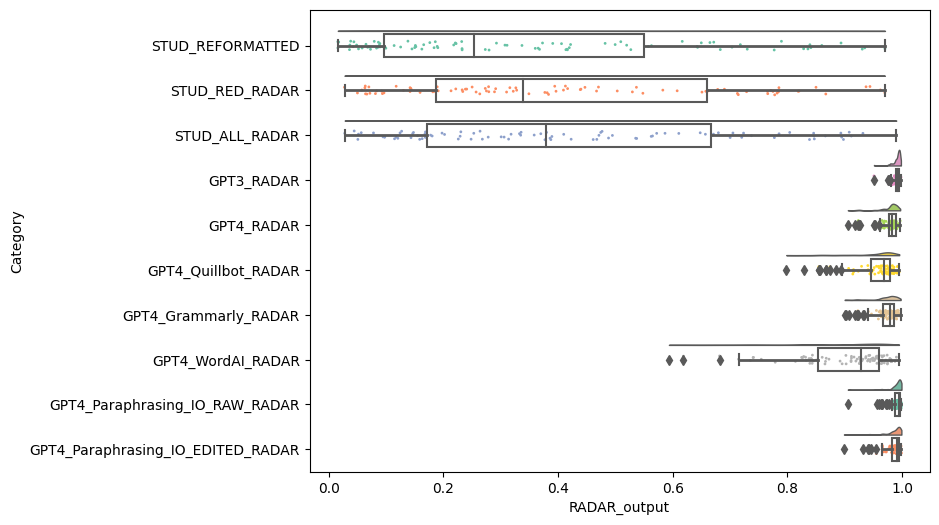

In [6]:
f, ax = plt.subplots(figsize=(8, 6))
pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='h', point_size=2, width_box=0.5)

<Axes: xlabel='Category', ylabel='RADAR_output'>

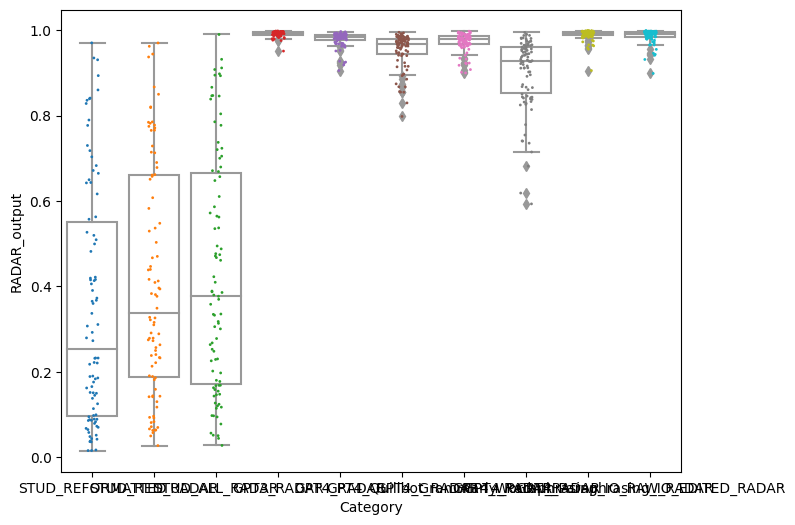

In [7]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=melted_data, x = 'Category', y = 'RADAR_output', size=2)
sns.boxplot(data=melted_data, x = 'Category', y = 'RADAR_output', color='White')

#### Raw HWT vs MGTs

[[Text(0, 0, 'Human'), Text(1, 0, 'GPT3'), Text(2, 0, 'GPT4')]]

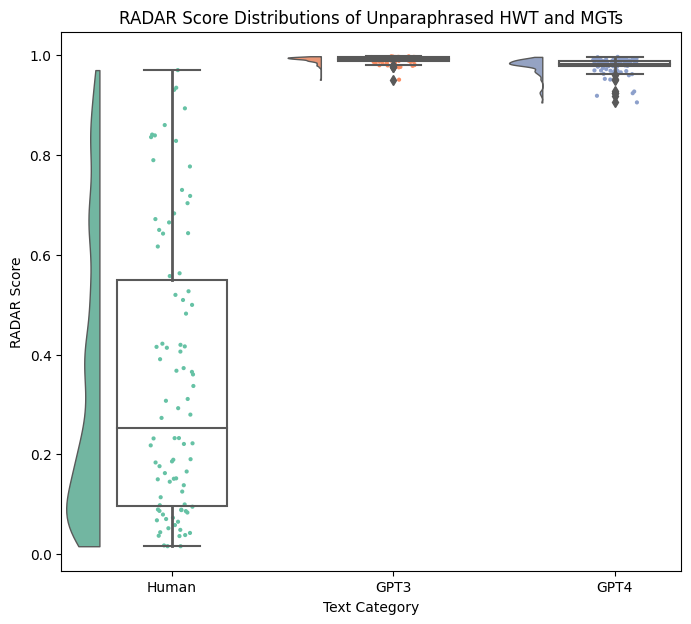

In [8]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED', 'GPT3_RADAR', 'GPT4_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count')
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Unparaphrased HWT and MGTs')
g.set(xticklabels=['Human','GPT3', 'GPT4'])

[[Text(0, 0, 'Human'), Text(1, 0, 'GPT3'), Text(2, 0, 'GPT4')]]

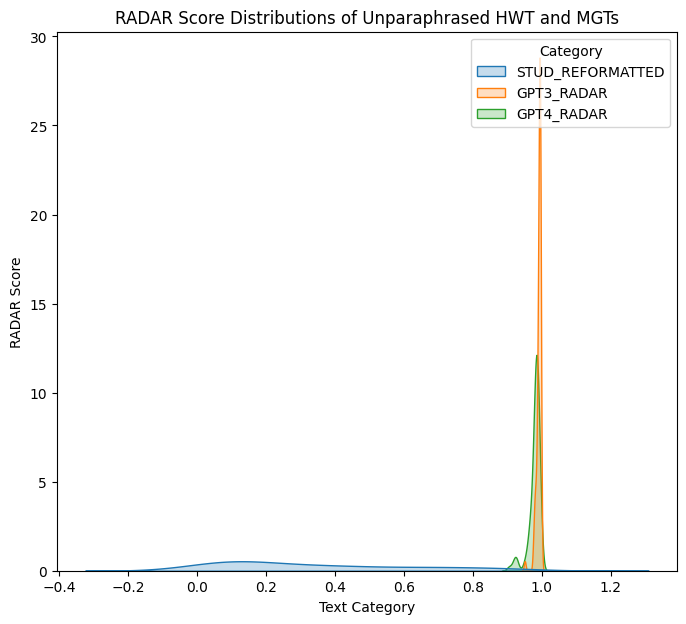

In [9]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED', 'GPT3_RADAR', 'GPT4_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
sns.kdeplot(data = melted_data, hue = 'Category', x = 'RADAR_output', fill=True)
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Unparaphrased HWT and MGTs')
g.set(xticklabels=['Human','GPT3', 'GPT4'])

#### Paraphrased MGTs

(0.0, 1.0)

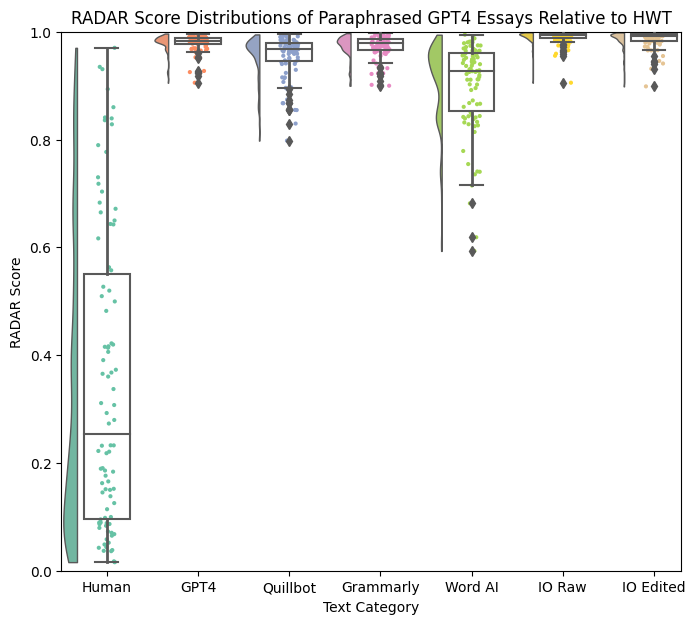

In [32]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED','GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
                   'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count')
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Paraphrased GPT4 Essays Relative to HWT')
g.set(xticklabels=['Human','GPT4', 'Quillbot', 'Grammarly', 'Word AI', 'IO Raw', 'IO Edited'])
plt.ylim(0,1)

#### Paraphrased HWT

(0.0, 1.0)

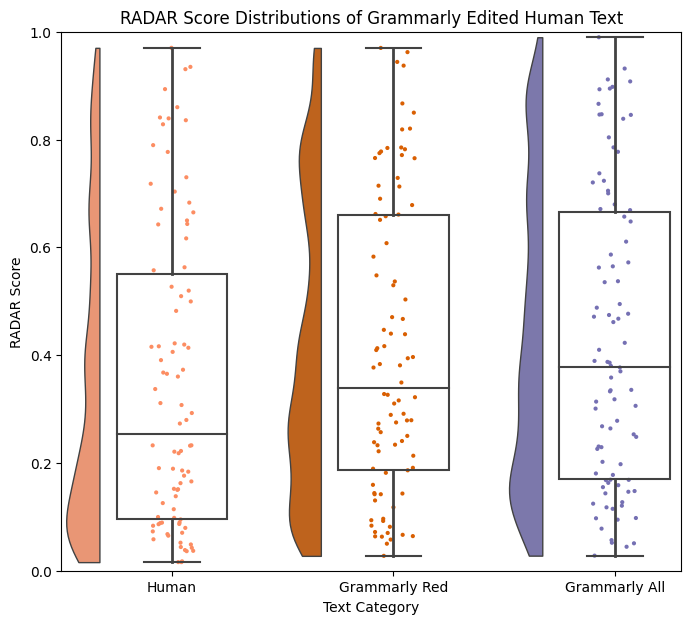

In [28]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED','STUD_RED_RADAR','STUD_ALL_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))

custom_colors = {'STUD_REFORMATTED': '#fc8d62', 'STUD_RED_RADAR': '#d95f02', 'STUD_ALL_RADAR': '#7570b3'}

g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count', palette=custom_colors)
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Grammarly Edited Human Text')
g.set(xticklabels=['Human','Grammarly Red', 'Grammarly All'])
plt.ylim(0,1)

#### Is there an optimal RADAR cut-off?

In [13]:
data = pd.read_csv('topics-post-RADAR-data.csv')
test = {
    'RADAR_threshold' : [x / 100 for x in range(101)],
    'HWT_FP' : [(data['STUD_REFORMATTED'] > (x / 100)).sum() / 90 * 100 for x in range(101)],
    'GPT4_FN' : [(data['GPT4_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'GPT3_FN' : [(data['GPT3_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'WordAI_FN' : [(data['GPT4_WordAI_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'Quillbot_FN': [(data['GPT4_Quillbot_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)]
}

df = pd.DataFrame(test)
melted = pd.melt(df, id_vars=['RADAR_threshold'])

In [14]:
df.tail(11)

,RADAR_threshold,HWT_FP,GPT4_FN,GPT3_FN,WordAI_FN,Quillbot_FN
90,0.90,3.333333,0.000000,0.000000,33.333333,13.333333
91,0.91,3.333333,1.111111,0.000000,35.555556,14.444444
92,0.92,3.333333,2.222222,0.000000,42.222222,17.777778
93,0.93,3.333333,5.555556,0.000000,51.111111,20.000000
94,0.94,1.111111,5.555556,0.000000,56.666667,20.000000
95,0.95,1.111111,5.555556,0.000000,65.555556,28.888889
96,0.96,1.111111,8.888889,1.111111,73.333333,35.555556
97,0.97,1.111111,20.000000,1.111111,85.555556,53.333333
98,0.98,0.000000,31.111111,6.666667,91.111111,77.777778
99,0.99,0.000000,83.333333,31.111111,97.777778,94.444444


(0.0, 100.0)

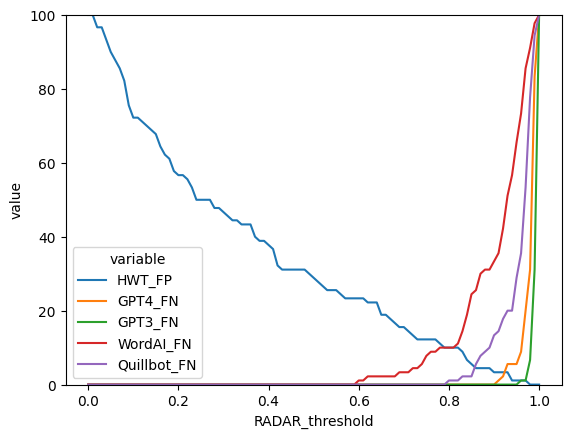

In [15]:
sns.lineplot(data=melted, x='RADAR_threshold', y = 'value', hue='variable')
plt.ylim(0,100)

#### Weber Wulff Comparison

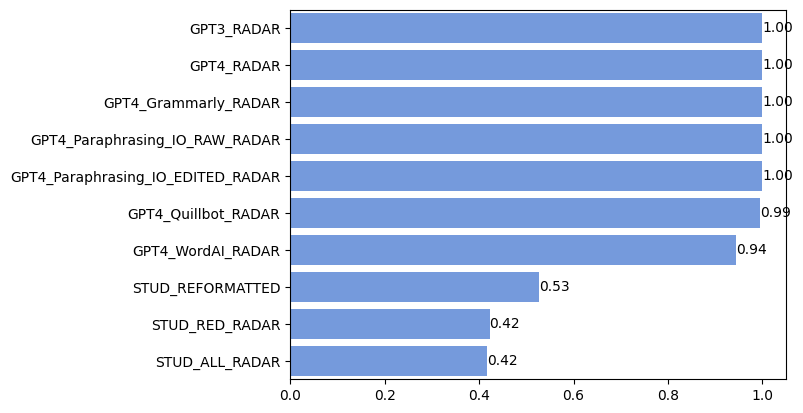

In [16]:
data = pd.read_csv('topics-post-RADAR-data.csv')

HWT_categories = ['STUD_REFORMATTED','STUD_RED_RADAR','STUD_ALL_RADAR']
MGT_categories = ['GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 
                  'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

accuracies = {}

for paraphraser in MGT_categories:
    scores = data[paraphraser]
    acc_1 = (scores > 0.8).sum() / 90 * 100
    acc_2 = (scores > 0.6).sum() / 90 * 100 
    acc_3 = ((scores > 0.8).sum() +  0.5 * ((scores > 0.6).sum() - (scores > 0.8).sum())) / 90 * 100
    result = (acc_1 + acc_2 + acc_3) / 300
    accuracies[paraphraser] = result

for paraphraser in HWT_categories:
    scores = data[paraphraser]
    acc_1 = (scores < 0.2).sum() / 90 * 100
    acc_2 = (scores < 0.4).sum() / 90 * 100 
    acc_3 = ((scores < 0.2).sum() +  0.5 * ((scores < 0.4).sum() - (scores < 0.2).sum())) / 90 * 100
    result = (acc_1 + acc_2 + acc_3) / 300
    accuracies[paraphraser] = result

accuracies = dict(sorted(accuracies.items(), key=lambda x:x[1], reverse=True))
x = list(accuracies.values())
y = list(accuracies.keys())
ax = sns.barplot(data=None, x=x, y=y, color='cornflowerblue')
for i in ax.containers:
    ax.bar_label(i, fmt='{:.2f}')

#### Text Length vs RADAR

In [17]:
text_length_data = pd.read_csv('topics-length-specific-RADAR.csv')

<Axes: xlabel='word_count', ylabel='RADAR_outputs'>

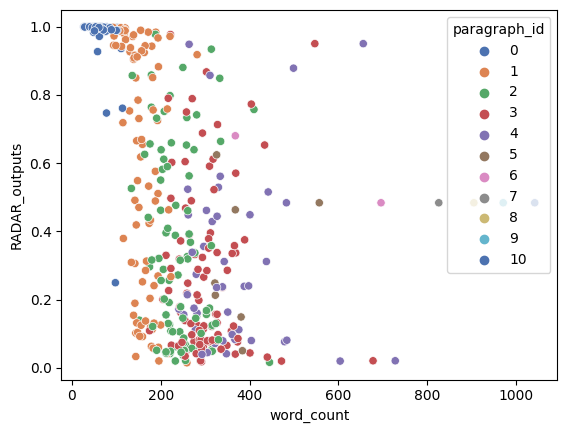

In [18]:
sns.scatterplot(data=text_length_data, 
                x=text_length_data['word_count'], 
                y=text_length_data['RADAR_outputs'], 
                hue=text_length_data['paragraph_id'],
                palette='deep')

In [19]:
for id in text_length_data['paragraph_id']:
    if(id > 4):
        print(id)

5
6
7
8
9
10
5
5
5
5
5
6
5
5
